In [1]:
from keras import Sequential
from keras.layers import RandomRotation, RandomTranslation, RandomFlip
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import argparse
import os

In [2]:
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K


class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        if K.image_data_format() == "channels_first":
            input_shape = (depth, height, width)
            chan_dim = 1
        else:
            input_shape = (height, width, depth)
            chan_dim = -1

        # first CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chan_dim))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chan_dim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # second CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chan_dim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chan_dim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # First and only set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model


In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np


def plot_training_loss_and_accuracy_keras(epoch_num: int, H: Sequential.fit, savefig_path=None):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epoch_num), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epoch_num), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epoch_num), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epoch_num), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss / Accuracy")
    plt.legend()
    if savefig_path:
        plt.savefig(savefig_path)
    plt.show()


In [4]:
args = {}
args["report"] = "/content/reports"
args["model"] = "/content/models"
args["num_models"] = 5


170498071/170498071 [==============================] - 4s 0us/step
[INFO] training model 1/5
Epoch 1/40
782/782 [==============================] - 29s 15ms/step - loss: 1.8971 - accuracy: 0.3696 - val_loss: 1.5840 - val_accuracy: 0.4603
Epoch 2/40
782/782 [==============================] - 11s 14ms/step - loss: 1.5529 - accuracy: 0.4605 - val_loss: 1.3082 - val_accuracy: 0.5472
Epoch 3/40
782/782 [==============================] - 11s 14ms/step - loss: 1.4017 - accuracy: 0.5094 - val_loss: 1.8368 - val_accuracy: 0.4640
Epoch 4/40
782/782 [==============================] - 11s 14ms/step - loss: 1.2994 - accuracy: 0.5420 - val_loss: 1.3695 - val_accuracy: 0.5663
Epoch 5/40
782/782 [==============================] - 11s 14ms/step - loss: 1.2239 - accuracy: 0.5675 - val_loss: 1.3194 - val_accuracy: 0.5800
Epoch 6/40
782/782 [==============================] - 11s 14ms/step - loss: 1.1631 - accuracy: 0.5872 - val_loss: 1.1789 - val_accuracy: 0.6108
Epoch 7/40
782/782 [=======================

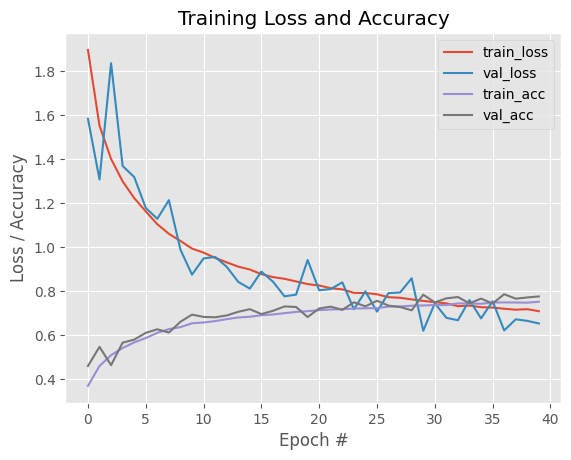

[INFO] training model 2/5
Epoch 1/40
782/782 [==============================] - 14s 15ms/step - loss: 1.8775 - accuracy: 0.3760 - val_loss: 1.7885 - val_accuracy: 0.4618
Epoch 2/40
782/782 [==============================] - 11s 14ms/step - loss: 1.5306 - accuracy: 0.4714 - val_loss: 1.4680 - val_accuracy: 0.5199
Epoch 3/40
782/782 [==============================] - 11s 14ms/step - loss: 1.3858 - accuracy: 0.5132 - val_loss: 1.1727 - val_accuracy: 0.5928
Epoch 4/40
782/782 [==============================] - 11s 14ms/step - loss: 1.2894 - accuracy: 0.5505 - val_loss: 1.3040 - val_accuracy: 0.5586
Epoch 5/40
782/782 [==============================] - 12s 15ms/step - loss: 1.2139 - accuracy: 0.5720 - val_loss: 1.1748 - val_accuracy: 0.6055
Epoch 6/40
782/782 [==============================] - 11s 14ms/step - loss: 1.1563 - accuracy: 0.5926 - val_loss: 0.9893 - val_accuracy: 0.6512
Epoch 7/40
782/782 [==============================] - 11s 14ms/step - loss: 1.1078 - accuracy: 0.6094 - val_lo

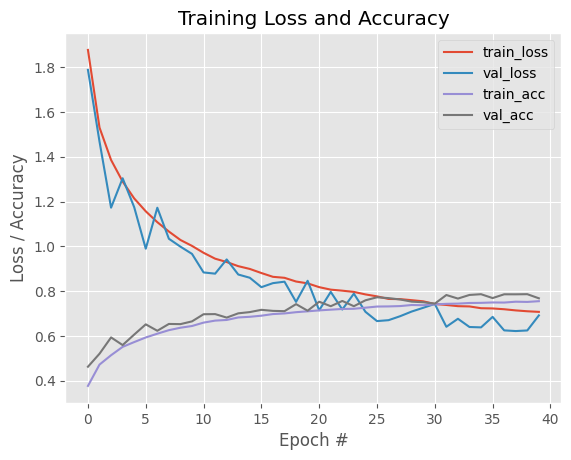

[INFO] training model 3/5
Epoch 1/40
782/782 [==============================] - 15s 15ms/step - loss: 1.8974 - accuracy: 0.3666 - val_loss: 1.5264 - val_accuracy: 0.4756
Epoch 2/40
782/782 [==============================] - 11s 14ms/step - loss: 1.5470 - accuracy: 0.4637 - val_loss: 1.4770 - val_accuracy: 0.5099
Epoch 3/40
782/782 [==============================] - 11s 14ms/step - loss: 1.4075 - accuracy: 0.5099 - val_loss: 1.4654 - val_accuracy: 0.5207
Epoch 4/40
782/782 [==============================] - 11s 15ms/step - loss: 1.3009 - accuracy: 0.5432 - val_loss: 1.3990 - val_accuracy: 0.5505
Epoch 5/40
782/782 [==============================] - 11s 14ms/step - loss: 1.2136 - accuracy: 0.5717 - val_loss: 1.1294 - val_accuracy: 0.6090
Epoch 6/40
782/782 [==============================] - 11s 14ms/step - loss: 1.1624 - accuracy: 0.5880 - val_loss: 1.1866 - val_accuracy: 0.6112
Epoch 7/40
782/782 [==============================] - 11s 14ms/step - loss: 1.1060 - accuracy: 0.6105 - val_lo

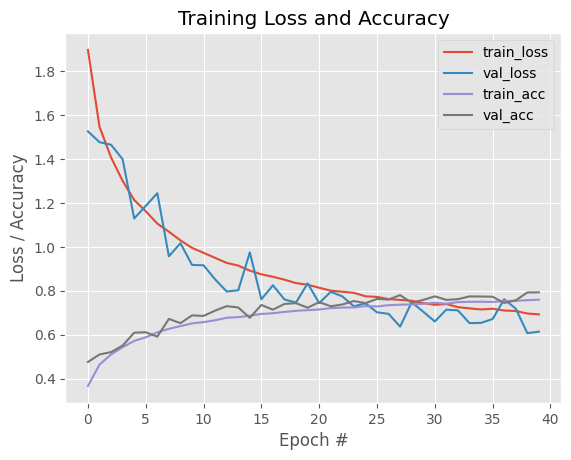

[INFO] training model 4/5
Epoch 1/40
782/782 [==============================] - 15s 15ms/step - loss: 1.9196 - accuracy: 0.3620 - val_loss: 1.7662 - val_accuracy: 0.4392
Epoch 2/40
782/782 [==============================] - 11s 15ms/step - loss: 1.5669 - accuracy: 0.4570 - val_loss: 1.5879 - val_accuracy: 0.4755
Epoch 3/40
782/782 [==============================] - 11s 14ms/step - loss: 1.4261 - accuracy: 0.4993 - val_loss: 1.2002 - val_accuracy: 0.5754
Epoch 4/40
782/782 [==============================] - 11s 15ms/step - loss: 1.3066 - accuracy: 0.5378 - val_loss: 1.1871 - val_accuracy: 0.5935
Epoch 5/40
782/782 [==============================] - 11s 15ms/step - loss: 1.2261 - accuracy: 0.5662 - val_loss: 1.1709 - val_accuracy: 0.6084
Epoch 6/40
782/782 [==============================] - 11s 15ms/step - loss: 1.1631 - accuracy: 0.5892 - val_loss: 1.1448 - val_accuracy: 0.6180
Epoch 7/40
782/782 [==============================] - 12s 15ms/step - loss: 1.1143 - accuracy: 0.6066 - val_lo

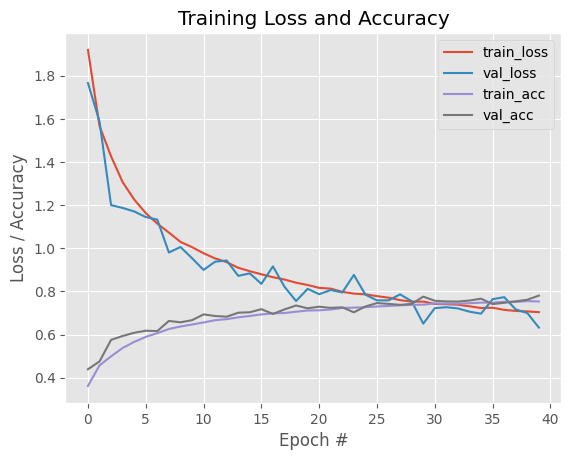

[INFO] training model 5/5
Epoch 1/40
782/782 [==============================] - 14s 15ms/step - loss: 1.8912 - accuracy: 0.3694 - val_loss: 2.1818 - val_accuracy: 0.3618
Epoch 2/40
782/782 [==============================] - 12s 15ms/step - loss: 1.5141 - accuracy: 0.4714 - val_loss: 1.7659 - val_accuracy: 0.4792
Epoch 3/40
782/782 [==============================] - 12s 15ms/step - loss: 1.3740 - accuracy: 0.5193 - val_loss: 1.4439 - val_accuracy: 0.5190
Epoch 4/40
782/782 [==============================] - 12s 15ms/step - loss: 1.2689 - accuracy: 0.5530 - val_loss: 1.1455 - val_accuracy: 0.6013
Epoch 5/40
782/782 [==============================] - 12s 15ms/step - loss: 1.2015 - accuracy: 0.5756 - val_loss: 1.1796 - val_accuracy: 0.5955
Epoch 6/40
782/782 [==============================] - 12s 15ms/step - loss: 1.1450 - accuracy: 0.5971 - val_loss: 1.2295 - val_accuracy: 0.5922
Epoch 7/40
782/782 [==============================] - 12s 15ms/step - loss: 1.0938 - accuracy: 0.6155 - val_lo

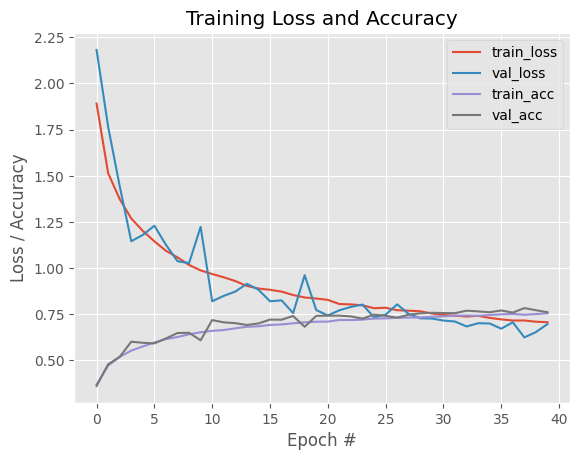

In [5]:
# normally train 5-10 CNNs in an ensemble due to computing expense

((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

data_augmentation = Sequential([
    RandomRotation(0.1),
    RandomTranslation(height_factor=0.1, width_factor=0.1),
    RandomFlip("horizontal"),
])

LEARNING_RATE = 0.01
NUM_EPOCHS = 40
BATCH_SIZE = 64

for i in range(0, args["num_models"]):
    print(f"[INFO] training model {i + 1}/{args['num_models']}")
    opt = SGD(learning_rate=LEARNING_RATE, weight_decay=LEARNING_RATE / NUM_EPOCHS, momentum=0.9, nesterov=True)
    model = Sequential([data_augmentation,
                        MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
                        ])
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)
    model_path = [args["model"], f"model_{i}.model"]
    model.save(os.path.sep.join(model_path))

    predictions = model.predict(testX, batch_size=BATCH_SIZE)
    report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names)

    report_path = [args["report"], f"model_{i}_report.txt"]
    with open(os.path.sep.join(report_path), "w") as f:
        f.write(report)

    graph_path = [args["report"], f"model_{i}_graph.png"]
    plot_training_loss_and_accuracy_keras(epoch_num=NUM_EPOCHS,
                                          H=H,
                                          savefig_path=os.path.sep.join(graph_path)
                                          )

##Now we test the ensemble to see if the accuracy has increased

In [6]:
from keras.models import load_model
import numpy as np
import glob

In [7]:
(testX, testY) = cifar10.load_data()[1]
testX = testX.astype("float") / 255.0

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

lb = LabelBinarizer()
testY = lb.fit_transform(testY)

model_paths = os.path.sep.join([args["model"], "*.model"])
# glob.glob() gathers all files using wildcard path above
model_paths = list(glob.glob(model_paths))
models = []

In [8]:
for (idx, model_path) in enumerate(model_paths):
    print(f"[INFO] loading mode {idx}/{len(model_paths)}")
    models.append(load_model(model_path))

print("[INFO] evaluating ensemble...")
predictions = []

[INFO] loading mode 0/5
[INFO] loading mode 1/5
[INFO] loading mode 2/5
[INFO] loading mode 3/5
[INFO] loading mode 4/5
[INFO] evaluating ensemble...


In [9]:
for model in models:
    predictions.append(model.predict(testX, batch_size=64))

157/157 [==============================] - 1s 3ms/step


In [10]:
predictions = np.average(predictions, axis=0)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.82      0.86      0.84      1000
  automobile       0.89      0.93      0.91      1000
        bird       0.86      0.64      0.73      1000
         cat       0.73      0.58      0.65      1000
        deer       0.78      0.75      0.76      1000
         dog       0.84      0.63      0.72      1000
        frog       0.63      0.96      0.76      1000
       horse       0.87      0.84      0.85      1000
        ship       0.87      0.92      0.89      1000
       truck       0.82      0.90      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

